Load the data

In [21]:
import pandas as pd

def load_local_file(file_path):
    local_df = pd.read_csv(file_path)
    return local_df 
    
finance_df = load_local_file('loan_payments.csv')   
print(finance_df.head())
print(finance_df.dtypes)
print(finance_df.info())

         id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0  38676116   41461848         8000         8000.0             8000.0   
1  38656203   41440010        13200        13200.0            13200.0   
2  38656154   41439961        16000        16000.0            16000.0   
3  38656128   41439934        15000        15000.0            15000.0   
4  38656121   41439927        15000        15000.0            15000.0   

        term  int_rate  instalment grade sub_grade  ... recoveries  \
0  36 months      7.49      248.82     A        A4  ...        0.0   
1  36 months      6.99      407.52     A        A3  ...        0.0   
2  36 months      7.49      497.63     A        A4  ...        0.0   
3  36 months     14.31      514.93     C        C4  ...        0.0   
4  36 months      6.03      456.54     A        A1  ...        0.0   

  collection_recovery_fee  last_payment_date last_payment_amount  \
0                     0.0           Jan-2022              248.82   
1   

Transform Functions

In [22]:
class DataTransform:
    def __init__(self, dataframe) -> None:
        """
        initialises the class
        """
        self.dataframe = dataframe
        

    def remove_txt(self, column):
        """ 
        Removes superfluent text from column data
        """
        self.dataframe[column] = pd.to_numeric(self.dataframe[column].str.extract('(\d+)', expand=False))
        
        

    def correct_date_format(self):
       """
       Converts the date format of all coumns that contain a date
       """
       for column_name in self.dataframe.columns:
        if 'date' in column_name.lower():
            self.dataframe[column_name] = pd.to_datetime(self.dataframe[column_name])
    
    def correct_single_date_column(self, column_name):
       self.dataframe[column_name] = pd.to_datetime(self.dataframe[column_name])
            
    
    def type_to_category(self, column_name):
       """
       converts a column to a categorical data type
       """
       self.dataframe[column_name] = self.dataframe[column_name].astype('category')
       

mydata = DataTransform(finance_df)


In [123]:
mydata.remove_txt('employment_length')

In [42]:
mydata.type_to_category('home_ownership')

In [36]:
"""
re-saves the updated DF to CSV
"""
finance_df.to_csv(r'C:\Users\Tom\EDS_Project_Loan_Finance\loan_payments_transformed.csv', index=False)

In [26]:
mydata.correct_date_format()


C:\Users\Tom\AppData\Local\Temp\ipykernel_15648\4113723130.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.dataframe[column_name] = pd.to_datetime(self.dataframe[column_name])
C:\Users\Tom\AppData\Local\Temp\ipykernel_15648\4113723130.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.dataframe[column_name] = pd.to_datetime(self.dataframe[column_name])
C:\Users\Tom\AppData\Local\Temp\ipykernel_15648\4113723130.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.dataframe[column_name] = pd.to_datetime(self.dataframe[column_name])
C:\Users\Tom\AppData\L

In [28]:
mydata.correct_single_date_column('earliest_credit_line')

C:\Users\Tom\AppData\Local\Temp\ipykernel_15648\4113723130.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.dataframe[column_name] = pd.to_datetime(self.dataframe[column_name])


In [31]:
mydata.remove_txt('term')

In [124]:
finance_df.dtypes

id                                      int64
member_id                               int64
loan_amount                             int64
funded_amount                         float64
funded_amount_inv                     float64
term                                  float64
int_rate                              float64
instalment                            float64
grade                                  object
sub_grade                              object
employment_length                     float64
home_ownership                       category
annual_inc                            float64
verification_status                    object
issue_date                     datetime64[ns]
loan_status                            object
payment_plan                           object
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

In [47]:
import pandas as pd

class DataFrameInfo:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def get_summary(self):
        """
        Returns a summary of the DataFrame including basic statistics.
        """
        return self.dataframe.describe()

    def get_missing_values(self):
        """
        Returns a DataFrame showing the count of missing values in each column.
        """
        return self.dataframe.isnull().sum().to_frame(name='missing_values')

    def get_data_types(self):
        """
        Returns a Series with data types of each column.
        """
        return self.dataframe.dtypes

    def get_unique_values(self, column_name):
        """
        Returns unique values in a specific column.
        """
        return self.dataframe[column_name].unique()

    def get_value_counts(self, column_name):
        """
        Returns value counts of unique values in a specific column.
        """
        return self.dataframe[column_name].value_counts()
    
    def get_shape_of_df(self):
        return self.dataframe.shape
    
    def count_distinct_values_categorical(self):
        """
        Returns the count of distinct values in categorical columns.
        Assumes categorical columns have 'category' dtype.
        """
        categorical_columns = self.dataframe.select_dtypes(include='category').columns
        distinct_values_count = {}
        for col in categorical_columns:
            distinct_values_count[col] = len(self.dataframe[col].cat.categories)
        return distinct_values_count

    def get_null_values_stats(self):
        """
        Generates a count and percentage of NULL values in each column.
        """
        null_count = self.dataframe.isnull().sum()
        null_percentage = (null_count / len(self.dataframe)) * 100
        null_stats = pd.DataFrame({
            'null_count': null_count,
            'null_percentage': null_percentage
        })
        return null_stats

df_info = DataFrameInfo(finance_df)

summary = df_info.get_summary()
print("DataFrame Summary:")
print(summary)

missing_values = df_info.get_missing_values()
print("\nMissing Values:")
print(missing_values)

data_types = df_info.get_data_types()
print("\nData Types:")
print(data_types)

unique_values_column = df_info.get_unique_values('employment_length')
print("\nUnique Values in Column:")
print(unique_values_column)

value_counts_column = df_info.get_value_counts('term')
print("\nValue Counts in Column:")
print(value_counts_column)

shape_of_df = df_info.get_shape_of_df()
print("\nShape of data is")
print(shape_of_df)

distinct_values_count = df_info.count_distinct_values_categorical()
print("\nDistinct Values Count in Categorical Columns:")
print(distinct_values_count)

# Generate count/percentage count of NULL values in each column
null_values_stats = df_info.get_null_values_stats()
print("\nNULL Values Stats:")
print(null_values_stats)


DataFrame Summary:
                 id     member_id   loan_amount  funded_amount  \
count  5.423100e+04  5.423100e+04  54231.000000   51224.000000   
mean   7.621797e+06  8.655350e+06  13333.076100   13229.509117   
min    5.552100e+04  7.069400e+04    500.000000     500.000000   
25%    7.594330e+05  9.587720e+05   7000.000000    7000.000000   
50%    7.084590e+06  8.709873e+06  12000.000000   12000.000000   
75%    8.860616e+06  1.052714e+07  18000.000000   18000.000000   
max    3.867612e+07  4.146185e+07  35000.000000   35000.000000   
std    9.571362e+06  1.031281e+07   8082.196709    8019.017599   

       funded_amount_inv          term      int_rate    instalment  \
count       54231.000000  49459.000000  49062.000000  54231.000000   
mean        12952.622979     42.606199     13.507328    400.013953   
min             0.000000     36.000000      5.420000     15.670000   
25%          6700.000000     36.000000     10.370000    224.205000   
50%         11300.000000     36.0000

In [54]:
columns_to_drop = ['mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_last_delinq']
dropped_finance_df = finance_df.drop(columns_to_drop, axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54231 non-null  int64         
 1   member_id                   54231 non-null  int64         
 2   loan_amount                 54231 non-null  int64         
 3   funded_amount               51224 non-null  float64       
 4   funded_amount_inv           54231 non-null  float64       
 5   term                        49459 non-null  float64       
 6   int_rate                    49062 non-null  float64       
 7   instalment                  54231 non-null  float64       
 8   grade                       54231 non-null  object        
 9   sub_grade                   54231 non-null  object        
 10  employment_length           52113 non-null  category      
 11  home_ownership              54231 non-null  category  

In [95]:
print(dropped_finance_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54231 non-null  int64         
 1   member_id                   54231 non-null  int64         
 2   loan_amount                 54231 non-null  int64         
 3   funded_amount               54231 non-null  float64       
 4   funded_amount_inv           54231 non-null  float64       
 5   term                        54231 non-null  float64       
 6   int_rate                    54231 non-null  float64       
 7   instalment                  54231 non-null  float64       
 8   grade                       54231 non-null  object        
 9   sub_grade                   54231 non-null  object        
 10  employment_length           54231 non-null  float64       
 11  home_ownership              54231 non-null  category  

In [97]:
null_counts = finance_df.isnull().sum()

print(null_counts)

id                                 0
member_id                          0
loan_amount                        0
funded_amount                   3007
funded_amount_inv                  0
term                            4772
int_rate                        5169
instalment                         0
grade                              0
sub_grade                          0
employment_length               2118
home_ownership                     0
annual_inc                         0
verification_status                0
issue_date                         0
loan_status                        0
payment_plan                       0
purpose                            0
dti                                0
delinq_2yrs                        0
earliest_credit_line               0
inq_last_6mths                     0
mths_since_last_delinq         31002
mths_since_last_record         48050
open_accounts                      0
total_accounts                     0
out_prncp                          0
o

In [94]:
null_counts = dropped_finance_df.isnull().sum()

print(null_counts)

id                            0
member_id                     0
loan_amount                   0
funded_amount                 0
funded_amount_inv             0
term                          0
int_rate                      0
instalment                    0
grade                         0
sub_grade                     0
employment_length             0
home_ownership                0
annual_inc                    0
verification_status           0
issue_date                    0
loan_status                   0
payment_plan                  0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_credit_line          0
inq_last_6mths                0
open_accounts                 0
total_accounts                0
out_prncp                     0
out_prncp_inv                 0
total_payment                 0
total_payment_inv             0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveri

In [135]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from matplotlib import pyplot


class Plotter:
    def __init__(self, dataframe) -> None:
        self.dataframe = dataframe
    
    def plot_histogram_of_column(self, column_name):
        plt.figure(figsize=(10, 6))
        plt.subplot(2, 1, 1)
        plt.title(f'Distribution of {column_name} Before Null Removal')
        self.dataframe[column_name].hist(bins=20, color='blue', alpha=0.7)
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
    
    def plot_histogram_of_column_after(self, column_name):
        plt.figure(figsize=(10, 6))
        plt.subplot(2, 1, 1)
        plt.title(f'Distribution of {column_name} After Null Removal')
        self.dataframe[column_name].hist(bins=20, color='blue', alpha=0.7)
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
    
    def q_plotter(self, column_name):
        qq_plot = qqplot(dropped_finance_df[column_name], scale=1, line='q', fit=True)
        pyplot.show()
    
    def identify_skewed_columns(self, threshold=0.5):
        skewed_columns = self.dataframe.apply(lambda x: x.skew()).sort_values(ascending=False)
        skewed_columns = skewed_columns[abs(skewed_columns) > threshold]
        return skewed_columns.index.tolist()



plot_before_df = Plotter(finance_df)
plot_after_df = Plotter(dropped_finance_df)

#plot_before_df.plot_histogram_of_column('funded_amount')
#plot_after_df.plot_histogram_of_column('funded_amount')
#plot_after_df.q_plotter('funded_amount')
skewed_columns = plot_after_df.identify_skewed_columns()
print("Skewed Columns:", skewed_columns)


TypeError: could not convert string to float: 'A'

In [99]:
class DataFrameTransform:
    def __init__(self, dataframe) -> None:
        self.dataframe = dataframe
        

    def impute_null_next_payment_date_inplace(self):
        column1 = 'last_payment_date'
        column2 = 'next_payment_date'
        self.dataframe[column2] = self.dataframe.apply(lambda row: row[column1] + pd.offsets.MonthBegin(1) if pd.isnull(row[column2]) else row[column2], axis=1)

    def remove_txt(self, column):
        """ 
        Removes superfluent text from column data
        """
        self.dataframe[column] = pd.to_numeric(self.dataframe[column].str.extract('(\d+)', expand=False))
    
    def impute_null_values_mean(self, columnname):
        mean_employment_length = self.dataframe[columnname].mean()
        self.dataframe[columnname].fillna(mean_employment_length, inplace=True)
    
    def impute_null_values_median(self, columnname):
        median_value = self.dataframe[columnname].median()
        self.dataframe[columnname].fillna(median_value, inplace=True)
    
    def impute_last_credit_pull_date(self):
        column1 = 'last_payment_date'
        column2 = 'last_credit_pull_date'
        self.dataframe[column2] = self.dataframe.apply(lambda row: row[column1] if pd.isnull(row[column2]) else row[column2], axis=1)
    
    def impute_last_payment_date(self):
       column1 = 'collections_12_mths_ex_med'
       self.dataframe[column1].fillna(0, inplace=True)
    
    def correct_date_format(self):
       """
       Converts the date format of all coumns that contain a date
       """
       for column_name in self.dataframe.columns:
        if 'date' in column_name.lower():
            self.dataframe[column_name] = pd.to_datetime(self.dataframe[column_name])
    
    def correct_single_date_column(self, column_name):
       self.dataframe[column_name] = pd.to_datetime(self.dataframe[column_name])


imputed_df = DataFrameTransform(dropped_finance_df)
imputed_df.correct_date_format()


In [101]:
print(finance_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54231 non-null  int64         
 1   member_id                    54231 non-null  int64         
 2   loan_amount                  54231 non-null  int64         
 3   funded_amount                51224 non-null  float64       
 4   funded_amount_inv            54231 non-null  float64       
 5   term                         49459 non-null  float64       
 6   int_rate                     49062 non-null  float64       
 7   instalment                   54231 non-null  float64       
 8   grade                        54231 non-null  object        
 9   sub_grade                    54231 non-null  object        
 10  employment_length            52113 non-null  category      
 11  home_ownership               54231 non-nu

In [130]:
skew_value = dropped_finance_df['int_rate'].skew()
print(skew_value)

dropped_finance_df['int_rate'].describe()




0.43319286508967225


count    54231.000000
mean        13.507328
std          4.178294
min          5.420000
25%         10.650000
50%         13.507328
75%         15.880000
max         26.060000
Name: int_rate, dtype: float64

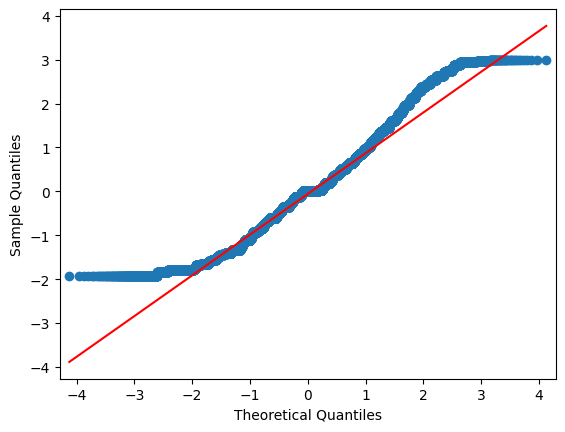

In [132]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qq_plot = qqplot(dropped_finance_df['int_rate'], scale=1, line='q', fit=True)
pyplot.show()

In [138]:
def identify_skewed_columns(dataframe, threshold=0.5):
    numeric_columns = dataframe.select_dtypes(include=['number'])
    skewed_columns = numeric_columns.apply(lambda x: x.skew()).sort_values(ascending=False)
    skewed_columns = skewed_columns[abs(skewed_columns) > threshold]
    return skewed_columns.index.tolist()

skewed_list = identify_skewed_columns(dropped_finance_df, threshold=0.5)
print("Skewed Columns", skewed_list)

Skewed Columns ['collection_recovery_fee', 'collections_12_mths_ex_med', 'recoveries', 'total_rec_late_fee', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'last_payment_amount', 'id', 'out_prncp_inv', 'out_prncp', 'member_id', 'total_rec_int', 'total_payment', 'total_rec_prncp', 'total_payment_inv', 'term', 'open_accounts', 'instalment', 'funded_amount', 'funded_amount_inv', 'loan_amount', 'total_accounts']
